Physics 474 - Fall 2022

Homework 5 - random numbers and monte carlo to test Central Limit Theorem

<font color='red'>Author: 
    


___________________________________________________________________________________
In this homework you will use random numbers with monte carlo techniques to explore the Central Limit Theorem


In probability theory, the central limit theorem (CLT) establishes that, in many situations, when independent random variables are summed up, their properly normalized sum tends toward a normal distribution even if the original variables themselves are not normally distributed.

The theorem is a key concept in probability theory because it implies that probabilistic and statistical methods that work for normal distributions can be applicable to many problems involving other types of distributions.

If you recall I mentioned this at the start of the semester in discussing the normal distribution and random measurement errors.

The CLT says if we have $n$ random samples ${x_1,x_2, \cdots,x_n}$ from a population with normalized probability distribution p(x), where p(x) has a mean $\mu_p$ and variance $\sigma_p^2$, as $n$ gets large the distribution for the sum of the 
random samples $X = \sum_1^n x_i$ tends to a normal distribution $\cal{Z({\rm X})}$ 


$\cal{Z({\rm X})} \propto \exp-\frac{({\rm X}-\mu_n)^2}{2 \sigma_n^2}$


where $\mu_n = n\,\mu_p$, and $\sigma_n=\frac{\sigma}{\sqrt{n}}=\frac{n\sigma_p}{\sqrt{n}}$

and the $\mu$ and $\sigma_p^2$ for the distribution $p(x)$ are given by

$\mu_p = \int x\,p(x) dx$<br>
$\sigma_p^2 = \int (\mu-x)^2 \,p(x) dx$

The CLT is generally good for $n\ge30$ for most reasonable distributions $p(x)$. However for uniform distributions it is a good approximation for even very small $n$.

We will test this theorem by running $N_{mc}$ monte carlo experiments of $n$ samples each from a random distribtion $p(x)$. Then, plotting(i.e. histogramming) the distribution of the sum $X = \sum_1^n x_i$ for the $N_{mc}$ trials, and finally comparing to the predicted distribution $\cal{Z({\rm X})}$


________________________________________________________________________________________
Part 1

In this part we will use a uniform distribution over an interval

$-a/2 \le x \le a/2$

for $p(x)$ and run $N_{mc}=5,000$ MC experiments

some useful facts for these uniform distributions
- $\mu_n=0$
- $\sigma_n = a \,\sqrt{n/12}$


Plot a histogram (50 bins) for the sum $X = \sum_1^n x_i$ along with the properly normalize $\cal{Z({\rm X})}$ for the following cases
- $a=1$ and $n=12$
- $a=1$ and $n=48$
- $a=4$ and $n=48$

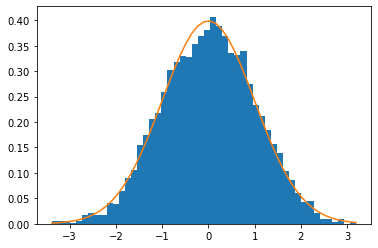

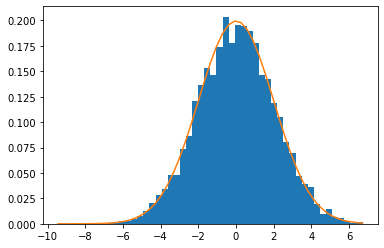

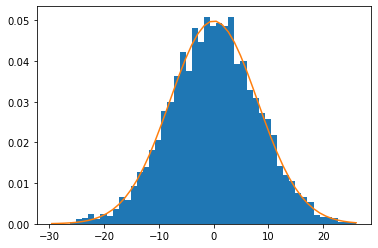

In [47]:
# Your code here

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.stats import binom #used to plot binomial distribution
from scipy.stats import norm #used to plot normal distribution
import scipy.stats as st

N=5000
Bins=50
xSum=np.empty(N)
a=1
n=12

for i in range(N):
    uniform=0
    uniform=-a/2+(a)*np.random.random(n)
    xSum[i]=np.sum(uniform)
    

def z(x,mu,sig):
    A=1/(sig*np.sqrt(2*np.pi))
    return A*np.exp(-(x**2)/(2*sig**2))



q, bins, patches = plt.hist(xSum,Bins,density=True)

thryNorm=st.norm.pdf(bins,0,a*np.sqrt(n/12))

thryNorm=thryNorm

plt.plot(bins,thryNorm)

#next part
N=5000
Bins=50
xSum=np.empty(N)
a=1
n=48

for i in range(N):
    uniform=0
    uniform=-a/2+(a)*np.random.random(n)
    xSum[i]=np.sum(uniform)
    

plt.figure()

q, bins, patches = plt.hist(xSum,Bins,density = True)

thryNorm=st.norm.pdf(bins,0,a*np.sqrt(n/12))

thryNorm=thryNorm

plt.plot(bins,thryNorm)

#final part
N=5000
Bins=50
xSum=np.empty(N)
a=4
n=48

for i in range(N):
    uniform=np.empty(n)
    uniform=-a/2+(a)*np.random.random(n)
    xSum[i]=np.sum(uniform)


plt.figure()

q, bins, patches = plt.hist(xSum,Bins,density=True)

thryNorm=st.norm.pdf(bins,0,a*np.sqrt(n/12))

thryNorm=thryNorm

plt.plot(bins,thryNorm)


Part 1 Observations


________________________________________________________________________________________
Part 2

In this part we will use a non uniform distribution over an interval

$0 \le x \le 1$

for $p(x)$ and run $N_{mc}=3,000$ MC experiments

NOTE: you'll have to normalize the $p(x)$ to calculate the mean and variance from the general formulas above.

plot a histogram (50 bins) for the sum $X = \sum_1^n x_i$ along with the properly normalize $\cal{Z({\rm X})}$ for the following case
- $p(x) \propto x^2$ and $n=30$

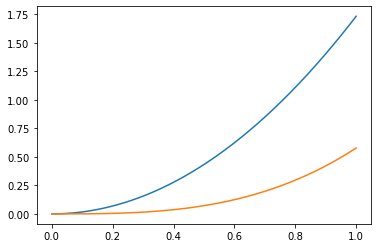

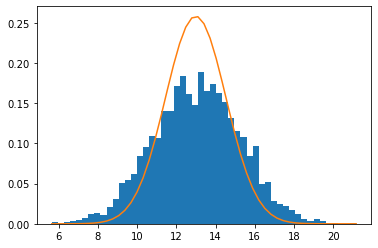

In [58]:
from scipy.integrate import quad
N=3000
Bins = 50
A=np.sqrt(3)

def p(x):
    y=A*x**2
    return y

xMin=0
xMax=1
x=np.linspace(xMin,xMax,N)
pInt = np.asarray([quad(p, xMin, x[i])[0] for i in range(x.size)])



n=30

plt.plot(x,p(x))
plt.plot(x,pInt)

dataSum=np.empty(N)
for i in range(N):
    Data = np.empty(n)
    Data = [x[np.argmax(pInt >= np.random.random())] for i in range(n)]
    dataSum[i]=np.sum(Data)
def p2(x):
    L=x*p(x)
    return L


mup=quad(p2, xMin, xMax)

mup=mup[0]

def p3(x):
    J=(mup-x)**2*p(x)
    return J

sigp=quad(p3,xMin,xMax)
sigp=np.sqrt(sigp[0])




mun=mu*n
sign=n*sig/np.sqrt(n)


q,bins,z=plt.hist(dataSum,Bins,density=True)


thryNorm=st.norm.pdf(bins,n*mup,n*sigp/np.sqrt(n))

thryNorm=thryNorm

plt.plot(bins,thryNorm)

Part 2 Observations

_______________________________________________________________________
Part 3

It turns out that in the limit of large statitistics if we combine $n_i$ random samplings from a number $N$ of different probability distributions $p_i(x)$ we still tend to a normal distribution with

$\mu_{tot} = \sum_i^N \mu_n^i = \sum_i^N n_i\mu_p^i$

$\sigma_{tot}^2 = \sum_i^N (\sigma_n^i)^2 =\sum_i^N n_i(\sigma_p^i)^2$



Part 3a:
plot a histogram (50 bins) for the sum $X = \sum_1^n x_i$ along with the properly normalize $\cal{Z({\rm X})}$ for the following case. Use $N_{mc}=3,000$
- use $N=2$ uniform distributions; $a_1=1$,$n_1=12$ and $a_2=3$,$n_2=30$

(array([  1.,   0.,   0.,   1.,   0.,   0.,   5.,   4.,   9.,   6.,  18.,
         20.,  18.,  44.,  44.,  49.,  83.,  92., 105., 127., 136., 145.,
        174., 157., 176., 173., 193., 180., 147., 131., 132., 140.,  87.,
         86.,  77.,  67.,  48.,  31.,  30.,  24.,  11.,   7.,  10.,   4.,
          1.,   3.,   2.,   0.,   1.,   1.]),
 array([-18.6715323 , -17.93763072, -17.20372913, -16.46982754,
        -15.73592596, -15.00202437, -14.26812278, -13.5342212 ,
        -12.80031961, -12.06641803, -11.33251644, -10.59861485,
         -9.86471327,  -9.13081168,  -8.39691009,  -7.66300851,
         -6.92910692,  -6.19520533,  -5.46130375,  -4.72740216,
         -3.99350058,  -3.25959899,  -2.5256974 ,  -1.79179582,
         -1.05789423,  -0.32399264,   0.40990894,   1.14381053,
          1.87771211,   2.6116137 ,   3.34551529,   4.07941687,
          4.81331846,   5.54722005,   6.28112163,   7.01502322,
          7.74892481,   8.48282639,   9.21672798,   9.95062956,
         10.684531

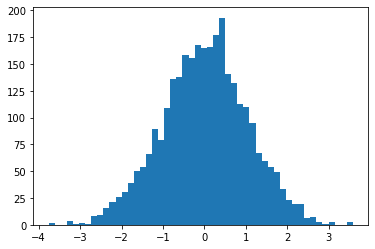

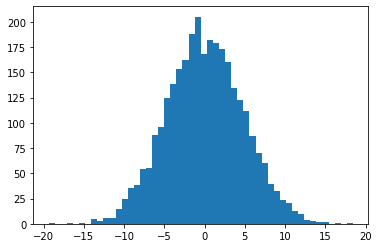

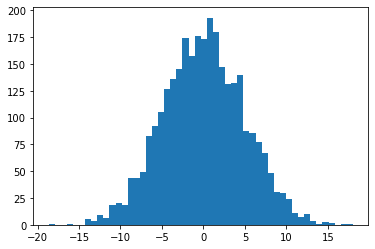

In [51]:
# Your code here...

N=3000
Bins=50

a1=1
n1=12
a2=3
n2=30
xSum1=np.empty(N)
xSum2=np.empty(N)
for i in range(N):
    uniform=0
    uniform=-a1/2+(a1)*np.random.random(n1)
    xSum1[i]=np.sum(uniform)
plt.hist(xSum1,Bins)

for i in range(N):
    uniform=0
    uniform=-a2/2+(a2)*np.random.random(n2)
    xSum2[i]=np.sum(uniform)
plt.figure()
plt.hist(xSum2,Bins)

xSumTot=np.empty(N)
for i in range(N):
    xSumTot[i]=xSum2[i]+xSum1[i]

plt.figure()
plt.hist(xSumTot,Bins)

Part 3b:

plot a histogram (50 bins) for the sum $X = \sum_1^n x_i$ along with the properly normalize $\cal{Z({\rm X})}$ for the following case. Use $N_{mc}=2,000$
- use $N=100$ uniform distributions; $a_i=$ random number from $0-5$, $n_i=$ random integer from $2-100$

(array([  1.,   4.,   3.,   2.,   5.,   5.,   3.,   8.,  15.,  15.,  22.,
         22.,  32.,  36.,  40.,  42.,  56.,  67.,  65.,  79.,  88., 106.,
         87.,  74.,  98., 100.,  89.,  91.,  88.,  91.,  78.,  85.,  68.,
         61.,  57.,  42.,  44.,  27.,  21.,  25.,   8.,   9.,  12.,   9.,
          7.,   4.,   2.,   5.,   1.,   1.]),
 array([-152.21300746, -146.16843674, -140.12386602, -134.07929529,
        -128.03472457, -121.99015385, -115.94558313, -109.9010124 ,
        -103.85644168,  -97.81187096,  -91.76730024,  -85.72272951,
         -79.67815879,  -73.63358807,  -67.58901735,  -61.54444662,
         -55.4998759 ,  -49.45530518,  -43.41073446,  -37.36616373,
         -31.32159301,  -25.27702229,  -19.23245157,  -13.18788084,
          -7.14331012,   -1.0987394 ,    4.94583132,   10.99040205,
          17.03497277,   23.07954349,   29.12411421,   35.16868494,
          41.21325566,   47.25782638,   53.3023971 ,   59.34696783,
          65.39153855,   71.43610927,   77.480

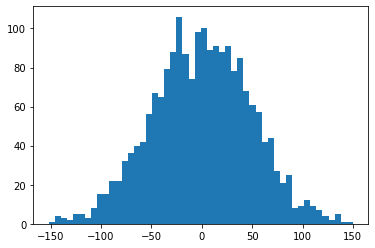

In [76]:
# Your code here...

Nmc=2000

N=100


Bins=50

newSum=np.empty(N)

totalSum=np.empty(Nmc)

for i in range(Nmc):
    for j in range(N):
        n=np.random.randint(2,100)
        a=np.random.randint(0,5)
        uniform=-a/2+a*np.random.random(n)
        newSum[j]=np.sum(uniform)
        sigSum[j]=a*np.sqrt(n/12)
    totalSum[i]=np.sum(newSum)
    sig[i]=np.sum(sigSum)

sigTot=np.sum(sig)

plt.hist(totalSum,Bins)

Part 3 Observations

_____________________________________________________
Observations, Summary and Conclusion




____________________________________________________________